**Exercici 1**  

Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from scipy.stats import shapiro

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
# Importar la BD
df = pd.read_csv('wineData.txt', index_col = None, header = None)
print(df.shape)
df.head()

(178, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Basándonos en la info del archivo win.Names.text, añadimos los nombres de las columnas.

df.columns =['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD280/OD315_of_diluted_wines', 'proline']
df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  OD280/OD315_of_diluted_wines  178 non-null    float64
 13  proli

In [6]:
df.isnull().sum()

class                           0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
OD280/OD315_of_diluted_wines    0
proline                         0
dtype: int64

- Es un DataFrame de 178 vinos.
- Las variables se refieren a las diferentes características de los mismos: Grado de alcohol, Intensidad del color..
- Son todas variables numéricas (float o int) excepto la variable *class*
- La variable *class* es una variable categórica (3 valores correspondientes a las 3 regiones de Italia a la que pertenecen los vinos)
- No existen variables binarias.
- No aparecen valores nulos o NaN en el DataFrame

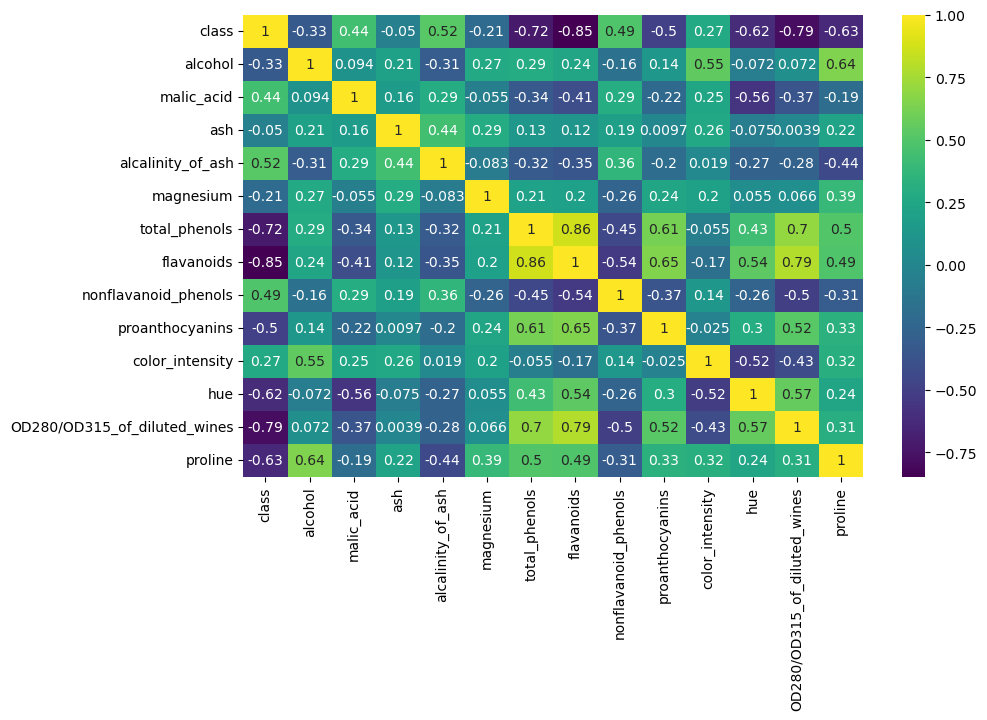

In [7]:
# Representamos la correlación que existe entre las variables:

plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, annot_kws = {'size': 10}, cmap = 'viridis');

Por un lado podemos observar un gran correlación entre:  
   - flavanoids y total_phenols: 0.86  
   - flavanoids y OD280/OD315_of_diluted_wines: 0.79  
   - total_phenols y OD280/OD315_of_diluted_wines: 0.7  
    
Por otro lado podemos ver que existe también una alta correlación, pero negativa entre:  
   - class y flavanoids: .0.85  
   - class y total_phenols: -0.72  
   - class y OD280/OD315_of_diluted_wines: -0.79  
   
Parece indicar que a mayor clase, menos de estos componentes lleva el vino. Es decir que la clase 1 tiene más flavanoids, total_phenols y un mayor valor del indice OD280/OD315.

Los **flavonoides** son un tipo de polifenoles y estan relacionados con el olor, el sabor, el color y otras propiedades del vino como la capacidad de envejecimiento.  Lo mismo ocurre con el **total_phenol.**.  
Ambos se producen y aparecen en el vino durante la maceración y se encuentran en la piel y semillas. Puesto que la maceración del vino blanco es escasa, el vino tinto suele tener mayor concentración de flavonoides y total_phenol que el blanco.  

En cuanto a **OD280/OD315**, es el indice que se usa para evaluar la cantidad de compuestos fenoles en el vino, por lo que está directamente relacionado con el total_phenol.
De esto podemos deducir que la clase 3, cuya correlación negativa indica menor cantidad de estos compuestos, es el vino blanco. y por oposicion, la clase 1 sería el tinto (dejando para la deducción que la dos debería ser el rosado)
- clase 1: Tinto
- clase 2: Rosado
- Clase 3: Blanco

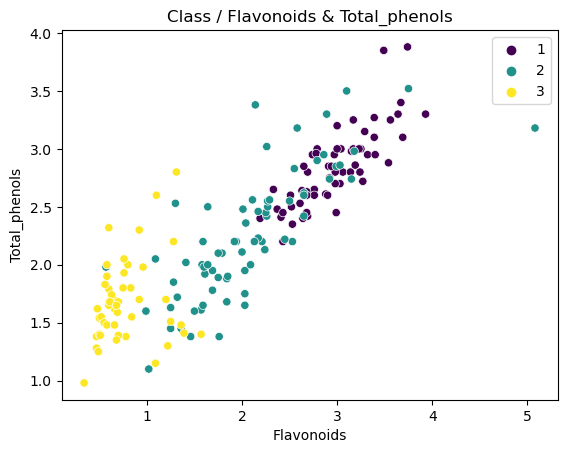

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['red', 'pink', 'yellow']

sns.scatterplot(data=df, x='flavanoids', y='total_phenols', hue= 'class', palette = 'viridis')

plt.xlabel("Flavonoids")
plt.ylabel("Total_phenols")
plt.title("Class / Flavonoids & Total_phenols")

# labels = ['Tinto', 'Rosado', 'Blanco']
plt.legend()
plt.show()


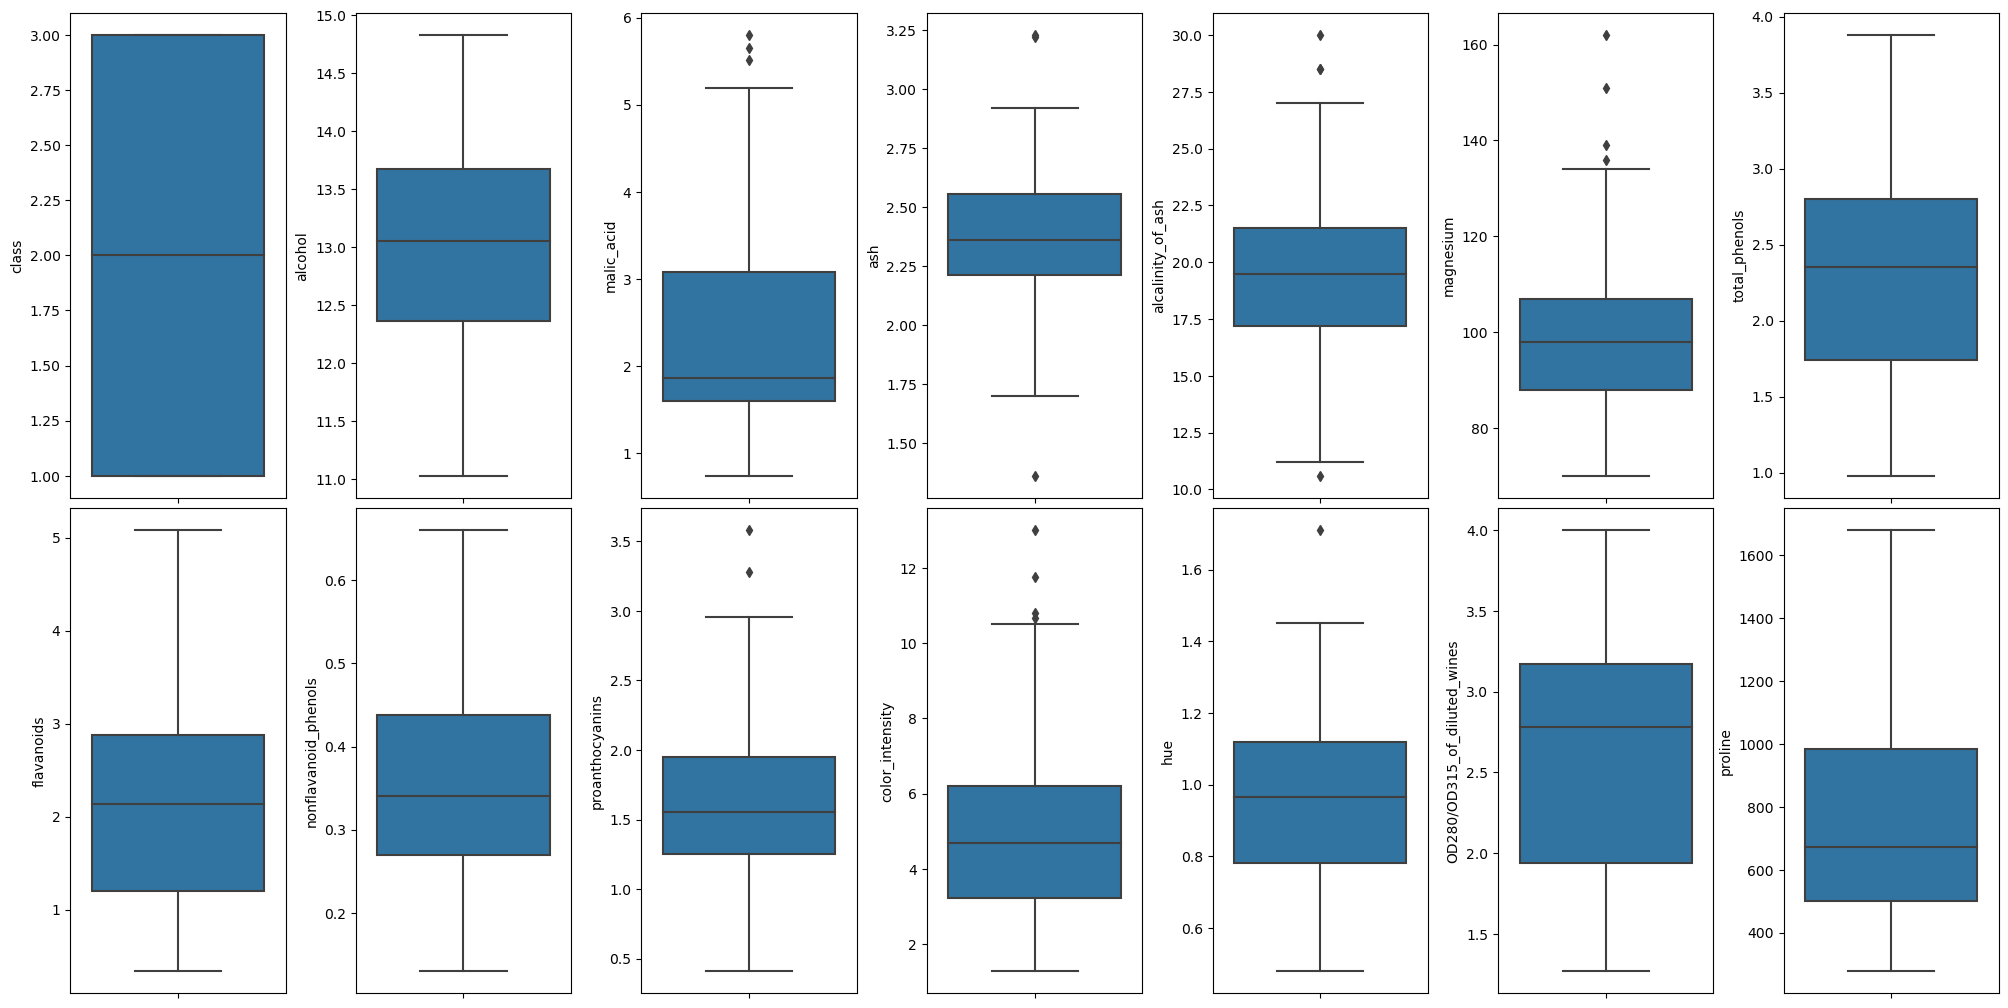

In [9]:
# Representamos gráficamente las distintas variables para ver su distribución, presencia / ausencia de outliers..

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4)


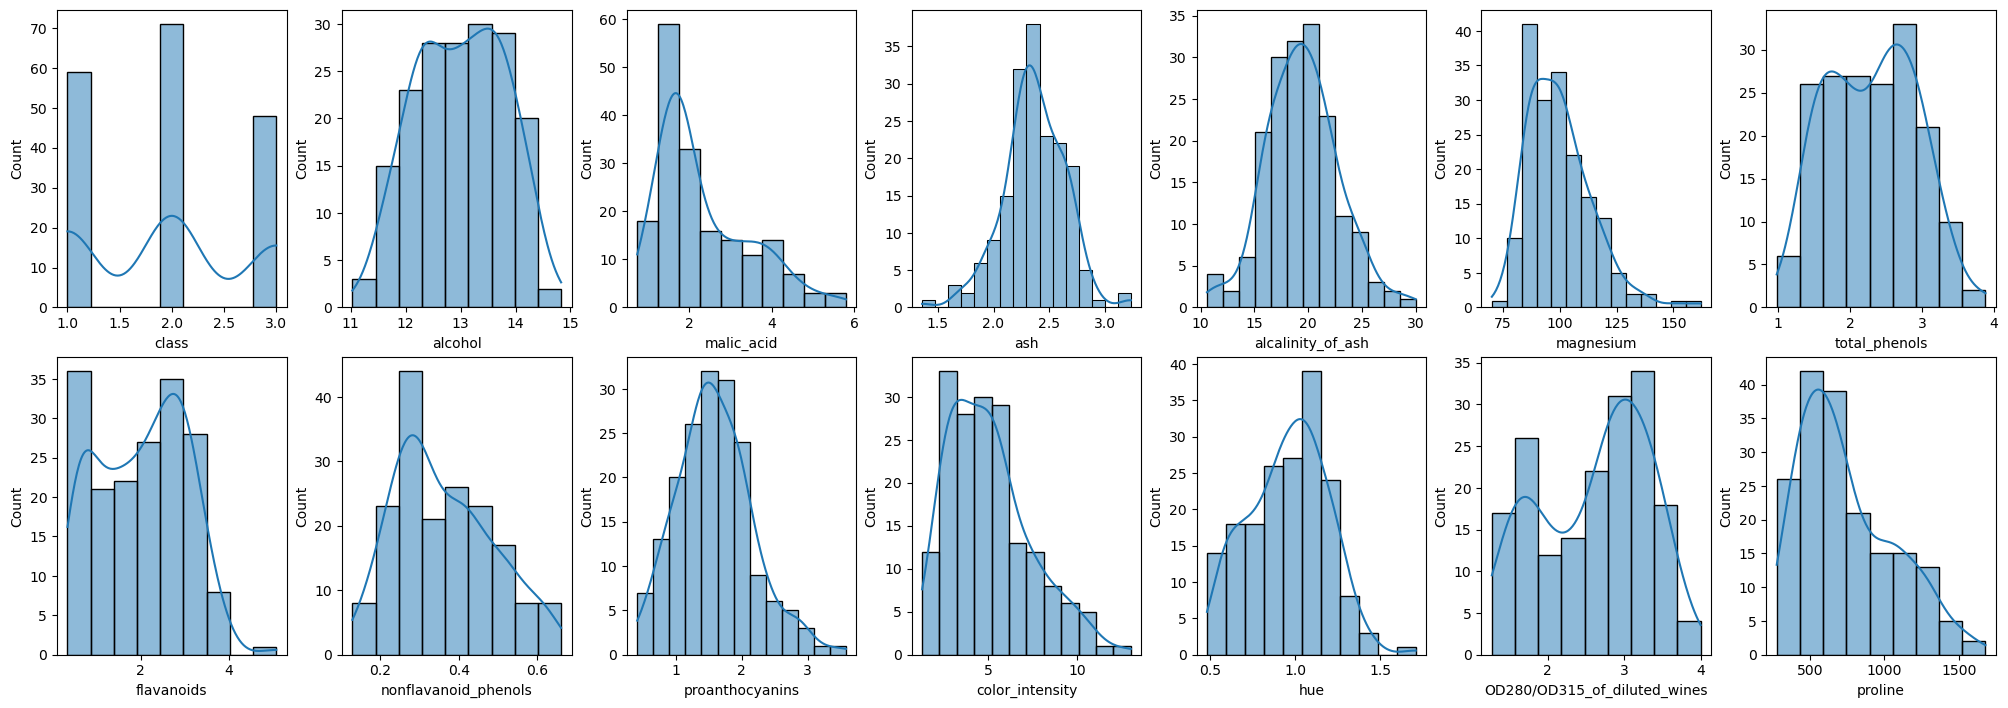

In [10]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 7))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.histplot(v, ax=axs[index], kde = True)
    index += 1
plt.tight_layout(pad=0.4)


- No aparece de manera clara ninguna variable con una distribución Normal, se ha de comprobar mediate cálculos.
- Existen varias variables con outliers: malic_acid, ash, alcalinity_of_ash, magnesium, proanthocyanins, color_intensity, hue

**Preprocesado:**

In [11]:
# Comprobamos que no existen duplicados:
df.duplicated().sum()

0

In [12]:
# Comprobamos si las variables siguen una distribución normal:

print('Hipótesis Nula (H0): La variable sigue una distribución Normal.\nHipótesis alternativa (H1): La Variable NO tiene una distribución Normal.\n')

for i in df.columns:
    stat, p = shapiro(df[i])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print(i, ': Probablemente sea Normal')
    else:
        print(i,': Probablemente NO sea Normal')


Hipótesis Nula (H0): La variable sigue una distribución Normal.
Hipótesis alternativa (H1): La Variable NO tiene una distribución Normal.

stat=0.804, p=0.000
class : Probablemente NO sea Normal
stat=0.982, p=0.020
alcohol : Probablemente NO sea Normal
stat=0.889, p=0.000
malic_acid : Probablemente NO sea Normal
stat=0.984, p=0.039
ash : Probablemente NO sea Normal
stat=0.990, p=0.264
alcalinity_of_ash : Probablemente sea Normal
stat=0.938, p=0.000
magnesium : Probablemente NO sea Normal
stat=0.977, p=0.004
total_phenols : Probablemente NO sea Normal
stat=0.955, p=0.000
flavanoids : Probablemente NO sea Normal
stat=0.963, p=0.000
nonflavanoid_phenols : Probablemente NO sea Normal
stat=0.981, p=0.014
proanthocyanins : Probablemente NO sea Normal
stat=0.940, p=0.000
color_intensity : Probablemente NO sea Normal
stat=0.981, p=0.017
hue : Probablemente NO sea Normal
stat=0.945, p=0.000
OD280/OD315_of_diluted_wines : Probablemente NO sea Normal
stat=0.931, p=0.000
proline : Probablemente NO

Todas las variables siguen una distribución **NO Normal**, **excepto alcalinity_of_ash** que sí parece serlo.

En estas condiciones, aplicaremos:  

- **RobustScaler** a las variables con outliers: malic_acid, ash, alcalinity_of_ash, magnesium, proanthocyanins, color_intensity, hue
- **MinMax** al resto de variables.
- **StandardScaler** a alcalinity_of_ash, puesto que sigue una distribución Normal.

In [13]:
# Hacemos una copia del df:
vinos = df.copy()

In [14]:
# Aplicamos StandardScaler:

Estandar = vinos[['alcalinity_of_ash']]
scaler = StandardScaler().fit(Estandar)
Estandar = scaler.transform(Estandar)
vinos['alcalinity_of_ash'] = Estandar

In [15]:
# Aplicamos RobustScaler:

Robust = ['malic_acid', 'ash', 'magnesium', 'proanthocyanins', 'color_intensity', 'hue']
scaler2 = preprocessing.RobustScaler().fit(vinos[Robust])
vinos[Robust] = scaler2.transform(vinos[Robust])

In [16]:
# aplicamos MinMax:

Min_Max = ['alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols','OD280/OD315_of_diluted_wines', 'proline']
scaler3 = preprocessing.MinMaxScaler().fit(vinos[Min_Max])
vinos[Min_Max] = scaler3.transform(vinos[Min_Max])

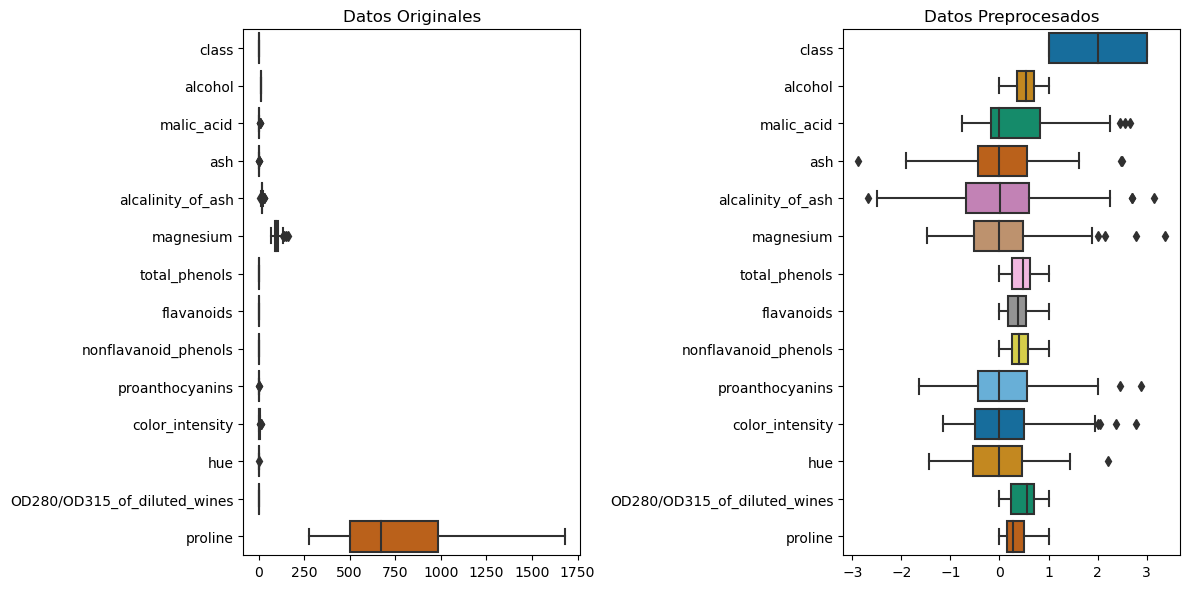

In [17]:
# Comparación datos originales / datos preprocesadod

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Dataset original
sns.boxplot(data=df, ax=axes[0], palette='colorblind', orient = 'h')
axes[0].set_title('Datos Originales')

# Dataset Preprocesado
sns.boxplot(data=vinos, ax=axes[1], palette='colorblind', orient = 'h')
axes[1].set_title('Datos Preprocesados')

plt.tight_layout()
plt.show()


In [18]:
vinos.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,0.842105,-0.104730,0.201439,-1.169593,1.526316,0.627586,0.573840,0.283019,1.050000,0.318792,0.222222,0.970696,0.561341
1,1,0.571053,-0.057432,-0.633094,-2.490847,0.105263,0.575862,0.510549,0.245283,-0.392857,-0.104027,0.251852,0.780220,0.550642
2,1,0.560526,0.334459,0.892086,-0.268738,0.157895,0.627586,0.611814,0.320755,1.792857,0.332215,0.192593,0.695971,0.646933
3,1,0.878947,0.057432,0.402878,-0.809251,0.789474,0.989655,0.664557,0.207547,0.892857,1.043624,-0.311111,0.798535,0.857347
4,1,0.581579,0.489865,1.467626,0.451946,1.052632,0.627586,0.495781,0.490566,0.378571,-0.124161,0.222222,0.608059,0.325963


In [19]:
# Separamos la varable dependiente de las independientes y los grupos de Train y Test (80% - 20%):

from sklearn.model_selection import train_test_split
X = vinos.drop(['class'], axis = 1)
y = vinos['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [20]:
# Comprobamos que los grupos tengan el mismo tamaño:

print(len(X_train) == len(y_train))
print(len(X_test) == len(y_test))

True
True


In [21]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,142.0,0.531060,0.211761,0.100000,0.352632,0.534211,0.709868,1.000000
malic_acid,142.0,0.319614,0.764058,-0.760135,-0.177365,-0.010135,0.787162,2.658784
ash,142.0,0.016010,0.814120,-2.877698,-0.453237,0.000000,0.568345,2.503597
alcalinity_of_ash,142.0,-0.021320,1.028476,-2.671018,-0.749194,-0.148624,0.602088,3.154511
magnesium,142.0,0.118977,0.757604,-1.473684,-0.473684,0.000000,0.526316,3.368421
total_phenols,142.0,0.458232,0.223273,0.000000,0.262931,0.474138,0.643103,1.000000
flavanoids,142.0,0.363374,0.213884,0.000000,0.191983,0.388186,0.543776,1.000000
nonflavanoid_phenols,142.0,0.434892,0.237436,0.018868,0.245283,0.358491,0.580189,1.000000
proanthocyanins,142.0,0.055030,0.828801,-1.635714,-0.435714,-0.014286,0.575000,2.892857
color_intensity,142.0,0.146162,0.741282,-0.989933,-0.462248,0.053691,0.536074,2.788591


In [22]:
y_test.describe().T

count    36.000000
mean      2.138889
std       0.723198
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: class, dtype: float64

Aplicamos primero con **DecisionTreeClassifier**:

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Creamos un objeto y entrenamos el modelo con los datos de entrenamiento:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

# Predicción para los datos de test:
pred_y_arbol = arbol.predict(X_test)

print('Precisión: %{}'.format(metrics.accuracy_score(y_test, pred_y_arbol)))
print(pred_y_arbol[0:10])

Precisión: %0.8888888888888888
[3 1 3 3 2 3 2 1 2 1]


Se aprecia una precisión muy alta:  
Acertará el 91,6% de las veces

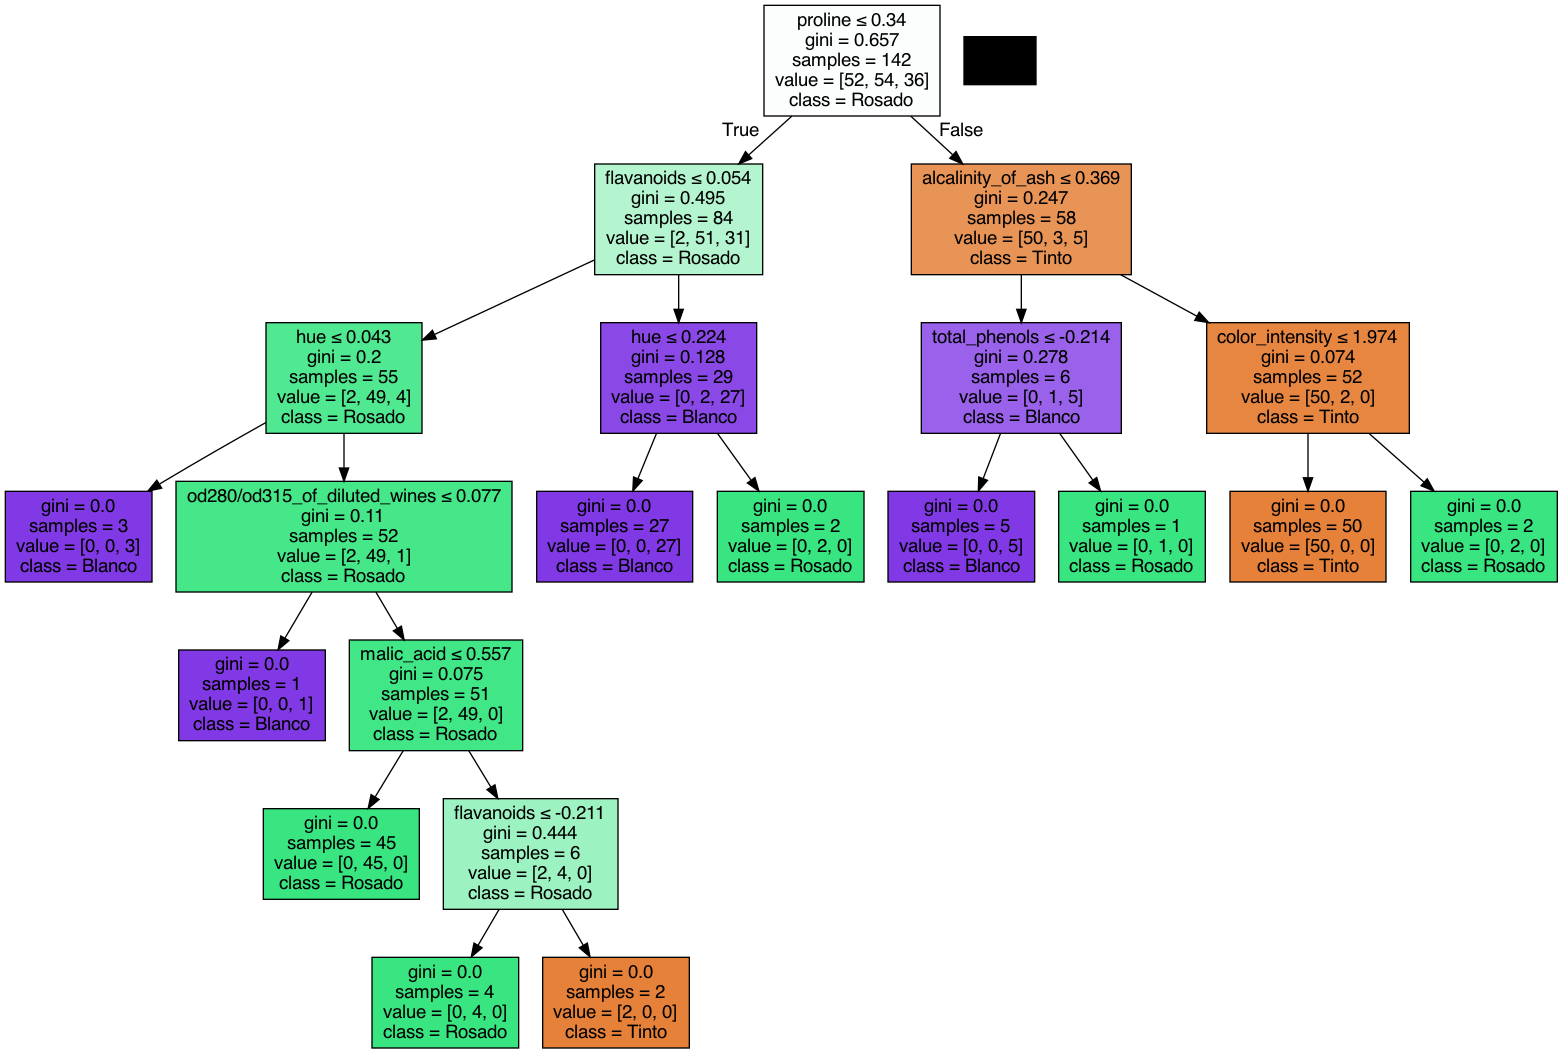

In [24]:
# Visualización del árbol:

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

columnas = ['malic_acid', 'ash', 'magnesium', 'proanthocyanins', 'color_intensity', 'alcalinity_of_ash', 'hue', 'alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'od280/od315_of_diluted_wines', 'proline']

dot_data = StringIO()
export_graphviz(arbol, out_file = dot_data, filled = True, special_characters = True, feature_names = columnas, class_names= ['Tinto', 'Rosado', 'Blanco'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('vinos.png')
Image(graph.create_png())

Aplicamos ahora KNN (**k-Nearest Neighbors**):

In [25]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

# Creamos un objeto y entrenamos el modelo con los datos de entrenamiento:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

# Predicción para los datos de test:
y_pred_KNN = KNN.predict(X_test)

# Què tan seguit la classificació serà correcta
print('Precisión: %{}'.format(metrics.accuracy_score(y_test, y_pred_KNN)))
print(y_pred_KNN)

Precisión: %0.8611111111111112
[3 1 3 3 2 3 2 1 2 3 1 2 3 2 2 2 1 3 1 1 2 1 2 1 1 3 2 3 3 2 2 1 3 2 2 1]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


También una precisión muy alta, aunque menor que el modelo de árbol de decisión:  
Acertará algo más del 86% de las veces.

Aplicamos ahora **SVM**:

In [26]:
from sklearn import svm

#Creamos un objeto SVM y entrenamos el modelo con los datos de entrenamiento:
modelo_SVM= svm.SVC()
modelo_SVM.fit(X_train, y_train)

#Predicción de los datos en el Test:
y_pred_SVM = modelo_SVM.predict(X_test)

#Importamos el módulo metrics para la precisión:
from sklearn import metrics

# Calculamos la precisión del modelo:
print("Precisión: %{}".format(metrics.accuracy_score(y_test, y_pred_SVM)))
print(y_pred_SVM)


Precisión: %0.9444444444444444
[3 1 3 3 2 3 2 1 2 3 1 2 3 2 2 2 2 3 1 1 2 2 2 1 1 3 2 3 3 2 2 1 3 2 2 2]


Precisión muy alta:  
El modelo acertará el 94.4% de las veces.

In [27]:
# Comparación de los tres modelos:

df_arbol = pd.DataFrame(pred_y_arbol, columns = ['Pred_Arbol'])
df_KNN = pd.DataFrame(y_pred_KNN, columns = ['Pred_KNN'])
df_SVM = pd.DataFrame(y_pred_SVM, columns = ['Pred_SVM'])

comp_pred = pd.concat([df_arbol, df_KNN, df_SVM], axis = 1)
comp_pred.head()

,Pred_Arbol,Pred_KNN,Pred_SVM
0,3,3,3
1,1,1,1
2,3,3,3
3,3,3,3
4,2,2,2


**Exercici 2**  

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

In [28]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [29]:
accuracy_SVM = metrics.accuracy_score(y_test, y_pred_SVM)
accuracy_KNN = metrics.accuracy_score(y_test, y_pred_KNN)
accuracy_arbol = metrics.accuracy_score(y_test, pred_y_arbol)
f1_SVM = metrics.f1_score(y_test, y_pred_SVM, average = 'macro')
f1_KNN = metrics.f1_score(y_test, y_pred_KNN, average = 'macro')
f1_arbol = metrics.f1_score(y_test, pred_y_arbol, average = 'macro')

accuracy_f1 = pd.DataFrame(data = [('Support_Vector_Machine', accuracy_SVM, f1_SVM), ('K-Neighbors Classifier', accuracy_KNN, f1_KNN), ('Decision Tree Classifier', accuracy_arbol, f1_arbol)])
accuracy_f1.columns = ['Modelo', 'Accuracy', 'F1']

accuracy_f1

,Modelo,Accuracy,F1
0,Support_Vector_Machine,0.944444,0.943677
1,K-Neighbors Classifier,0.861111,0.857670
2,Decision Tree Classifier,0.888889,0.882143


Los tres modelos tienen una buena precisión. Especialmente SVM y DecisionTreeClassifier.  
Entre estos dos, El F1 es algo mejor en **SVM**, por lo que en conjunto sería el mejor modelo.

In [30]:
# Calculamos las matrices de confusión:
from sklearn.metrics import confusion_matrix

cf_matr_SVM = confusion_matrix(y_test, y_pred_SVM)
cf_matr_KNN = confusion_matrix(y_test, y_pred_KNN)
cf_matr_arbol = metrics.confusion_matrix(y_test, pred_y_arbol)

clases = ['Tinto', 'Rosado', 'Blanco']
#cf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_SVM), columns = clases, index = clases)

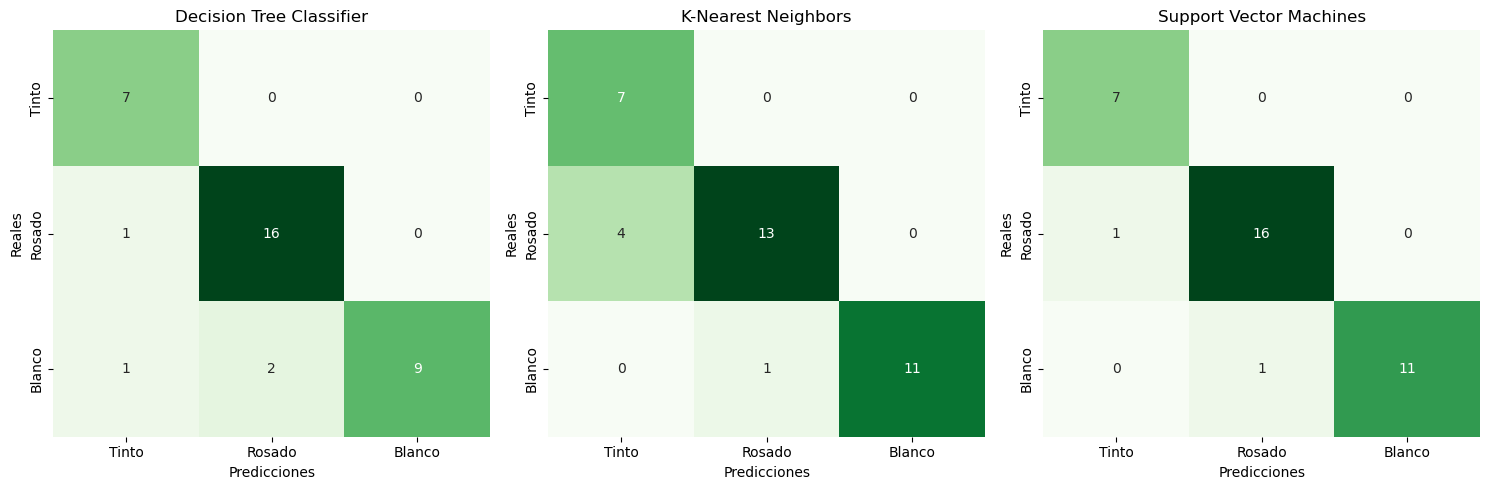

In [31]:
# Creo 3 subplots para las matrices de confusión:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Heatmap 1
sns.heatmap(cf_matr_arbol, annot=True, fmt='d', ax=axs[0], cmap='Greens', cbar=False)
axs[0].set_xlabel('Predicciones')
axs[0].set_ylabel('Reales')
axs[0].set_title('Decision Tree Classifier')
axs[0].xaxis.set_ticklabels(clases)
axs[0].yaxis.set_ticklabels(clases)

# Heatmap 2
sns.heatmap(cf_matr_KNN, annot=True, fmt='d', ax=axs[1], cmap='Greens', cbar=False)
axs[1].set_xlabel('Predicciones')
axs[1].set_ylabel('Reales')
axs[1].set_title('K-Nearest Neighbors')
axs[1].xaxis.set_ticklabels(clases)
axs[1].yaxis.set_ticklabels(clases)

# Heatmap 3
sns.heatmap(cf_matr_SVM, annot=True, fmt='d', ax=axs[2], cmap='Greens', cbar=False)
axs[2].set_xlabel('Predicciones')
axs[2].set_ylabel('Reales')
axs[2].set_title('Support Vector Machines')
axs[2].xaxis.set_ticklabels(clases)
axs[2].yaxis.set_ticklabels(clases)

# Mostra la figura
plt.tight_layout()
plt.show()


A la vista de las Matrices de confusión, podemos establecer que los dos modelos más ajustados son **Decision Tree Classifier** y **Support Vector Machines**:
- Decision Tree Classifier: Tanto en el Tinto como en el Blanco, el modelo ha acertado todas las predicciones y solo ha fallado dos del Rosado (Donde predijo Blanco).  
- Support Vector Machines: El resultado es muy similar, hafallado solo dos predicciones (Una en tinto, que la predijo como Rosado y otra Rosado que la predijo como Blanco).  
- K-Nearest Neighbors: El modelo ha sido menos preciso, fallando 5 predicciones.

In [32]:
from sklearn.metrics import classification_report

**Decision Tree Classifier**

In [33]:
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           1       0.88      1.00      0.93         7
           2       0.94      0.94      0.94        17
           3       1.00      0.92      0.96        12

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



**K-Nearest Neighbors**

In [34]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           1       0.64      1.00      0.78         7
           2       0.93      0.76      0.84        17
           3       1.00      0.92      0.96        12

    accuracy                           0.86        36
   macro avg       0.85      0.89      0.86        36
weighted avg       0.90      0.86      0.87        36



**Support Vector Machines**

In [35]:
print(classification_report(y_test, pred_y_arbol))

              precision    recall  f1-score   support

           1       0.78      1.00      0.88         7
           2       0.89      0.94      0.91        17
           3       1.00      0.75      0.86        12

    accuracy                           0.89        36
   macro avg       0.89      0.90      0.88        36
weighted avg       0.90      0.89      0.89        36



El análisis del classification_report vuelve a mostrar que los modelos más ajustados son el **Decision Tree Classifier** y el **Support Vector Machines**:
- El informe, sobre 36 muestras (12 de Blanco, 17 de Rosado, y 7 de Tinto) muestra una precisión (accuracy) del 94% mientras que en el K-Nearest Neighbors, es del 84%.  
- Entre los dos dos modelos más ajustados, aunque existen pequeñas diferencias en algunos puntos, la media ponderada es la misma en ambos: (weighted avg: 0.95 - 0.94 - 0.94).



**Exercici 3**  

Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

In [36]:
from sklearn.model_selection import GridSearchCV

**Miramos los parametros del modelo DecisionTreeClassifier:**

In [37]:
arbol.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [38]:
parametros_arbol = {
    'ccp_alpha': [0.0, 0.001, 0.01, 0.1, 1.0],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini','entropy'],
    'max_depth': [None, 10, 20, 30, 50],
    'max_features': [None],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.0],
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_weight_fraction_leaf': [0.0],
    'random_state': [77],
    'splitter': ['best']
}

In [39]:
grid = GridSearchCV(DecisionTreeClassifier(), parametros_arbol, cv=10)
grid.fit(X, y)
print(grid.best_params_)

{'ccp_alpha': 0.1, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 77, 'splitter': 'best'}


In [40]:
# Repetimos el modelo con los nuevos parámetros:
modelo_arbol2 = DecisionTreeClassifier(**grid.best_params_)

modelo_arbol2.fit(X_train, y_train)
prediccion_y_arbol2= modelo_arbol2.predict(X_test)

print('Precisión del train Nuevo: ', modelo_arbol2.score(X_train, y_train))
print("Precisión del test Nuevo: ", modelo_arbol2.score(X_test, y_test))


Precisión del train Nuevo:  0.9788732394366197
Precisión del test Nuevo:  0.9166666666666666


**Miramos los parametros del modelo K-Nearest Neighbors:**

In [41]:
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [42]:
parametros_KNN = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'n_neighbors': [2,3,4,5],
    'leaf_size': [15, 30, 45],
    'n_jobs':  [None, -1, 1],
    'weights': ['distance']
}

In [43]:
grid2 = GridSearchCV(KNeighborsClassifier(), parametros_KNN, cv=5)
grid2.fit(X, y)
print(grid2.best_params_)

{'algorithm': 'auto', 'leaf_size': 15, 'metric': 'manhattan', 'n_jobs': None, 'n_neighbors': 4, 'weights': 'distance'}


In [44]:
# Repetimos el modelo con los nuevos parámetros:
modelo_KNN2 = KNeighborsClassifier(**grid2.best_params_)

modelo_KNN2.fit(X_train, y_train)
prediccion_y_KNN2= modelo_KNN2.predict(X_test)

print('Precisión del train Nuevo: ', modelo_KNN2.score(X_train, y_train))
print("Precisión del test Nuevo: ", modelo_KNN2.score(X_test, y_test))


Precisión del train Nuevo:  1.0
Precisión del test Nuevo:  0.9444444444444444


**Miramos los parámetros del Support Vector Machines**

In [45]:
modelo_SVM.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [46]:
parametros_SVM = {
    'C': [1, 5, 8, 10,12],
    'break_ties': [False, True],
    'degree': [2, 3, 4],
    'gamma': ['scale','auto'],
    'kernel': ['linear', 'rbf', 'poly'],
    'max_iter': [-1],
    'probability': [False, True], 
}

In [47]:
grid3 = GridSearchCV(svm.SVC(), parametros_SVM, cv=10)
grid3.fit(X, y)
print(grid3.best_params_)

{'C': 1, 'break_ties': False, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False}


In [48]:
# Repetimos el modelo con los nuevos parámetros:
modelo_SVM2 = svm.SVC(**grid3.best_params_)

modelo_SVM2.fit(X_train, y_train)
prediccion_y_SVM2= modelo_SVM2.predict(X_test)

print('Precisión del train Nuevo: ', modelo_SVM2.score(X_train, y_train))
print("Precisión del test Nuevo: ", modelo_SVM2.score(X_test, y_test))


Precisión del train Nuevo:  0.9929577464788732
Precisión del test Nuevo:  0.9722222222222222


In [49]:
accuracy_SVM = metrics.accuracy_score(y_test, y_pred_SVM)
accuracy_KNN = metrics.accuracy_score(y_test, y_pred_KNN)
accuracy_arbol = metrics.accuracy_score(y_test, pred_y_arbol)
f1_SVM = metrics.f1_score(y_test, y_pred_SVM, average = 'macro')
f1_KNN = metrics.f1_score(y_test, y_pred_KNN, average = 'macro')
f1_arbol = metrics.f1_score(y_test, pred_y_arbol, average = 'macro')

accuracy_SVM_2 = metrics.accuracy_score(y_test, prediccion_y_SVM2)
accuracy_KNN_2 = metrics.accuracy_score(y_test, prediccion_y_KNN2)
accuracy_arbol_2 = metrics.accuracy_score(y_test, prediccion_y_arbol2)
f1_SVM_2 = metrics.f1_score(y_test, prediccion_y_SVM2, average = 'macro')
f1_KNN_2 = metrics.f1_score(y_test, prediccion_y_KNN2, average = 'macro')
f1_arbol_2 = metrics.f1_score(y_test, prediccion_y_arbol2, average = 'macro')

comp_accuracy_f1 = pd.DataFrame(data = [('Support_Vector_Machine', accuracy_SVM, f1_SVM, accuracy_SVM_2,f1_SVM_2), ('K-Neighbors Classifier', accuracy_KNN, f1_KNN, accuracy_KNN_2, f1_KNN_2), ('Decision Tree Classifier', accuracy_arbol, f1_arbol, accuracy_arbol_2, f1_arbol_2)])
comp_accuracy_f1.columns = ['Modelo', 'Accuracy', 'F1', 'Accur_Nuevo', 'F1_Nuevo']

comp_accuracy_f1

,Modelo,Accuracy,F1,Accur_Nuevo,F1_Nuevo
0,Support_Vector_Machine,0.944444,0.943677,0.972222,0.975983
1,K-Neighbors Classifier,0.861111,0.857670,0.944444,0.937500
2,Decision Tree Classifier,0.888889,0.882143,0.916667,0.913538


En la tabla se aprecian mejoras con los nuevos modelos, especialmente se nota la mejoría en la Accuracy de K-Neighbors Classifier	

**Exercici 4**

Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [50]:
# Rendimiento / Puntuación en Support Vector Machines (SVM):

rend_SVM_CV = cross_val_score(svm.SVC(), X, y, cv=5,scoring ='r2')
max(rend_SVM_CV)

1.0

In [51]:
# Rendimiento / Puntuación en K - Neighbors:
rend_KNN_CV = cross_val_score(KNeighborsClassifier(), X, y, cv=5,scoring ='r2')
max(rend_KNN_CV)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.8172588832487309

In [52]:
# Rendimiento / Puntuación en Decision Tree Classifier:

rend_arbol_CV = cross_val_score(DecisionTreeClassifier(), X, y, cv=5,scoring ='r2')
max(rend_arbol_CV)

0.9086294416243654

In [53]:
comp_todas = pd.DataFrame(data = [('Support_Vector_Machine', accuracy_SVM, f1_SVM, accuracy_SVM_2,f1_SVM_2, max(rend_SVM_CV)), ('K-Neighbors Classifier', accuracy_KNN, f1_KNN, accuracy_KNN_2, f1_KNN_2, max(rend_KNN_CV)), ('Decision Tree Classifier', accuracy_arbol, f1_arbol, accuracy_arbol_2, f1_arbol_2, max(rend_arbol_CV))])
comp_todas.columns = ['Modelo', 'Accuracy', 'F1', 'Accur_Nuevo', 'F1_Nuevo', 'cross-validation']

comp_todas

,Modelo,Accuracy,F1,Accur_Nuevo,F1_Nuevo,cross-validation
0,Support_Vector_Machine,0.944444,0.943677,0.972222,0.975983,1.000000
1,K-Neighbors Classifier,0.861111,0.857670,0.944444,0.937500,0.817259
2,Decision Tree Classifier,0.888889,0.882143,0.916667,0.913538,0.908629


**Exercici 5**  

Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

Dado que existen algunas columnas como el indice de los Fenoles que podría tener demasiada correlación con la columna de los flavanoides, comprobaremos la multicolienealiedad de las variables.  
Lo haremos mediante el metodo de **Variance Inflation Factor** (VIF).


In [54]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Hacemos una copia del DF:
df_vif = vinos.copy()
# Selecccionamos las variables predictoras:
predictoras = df_vif[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash','magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols','proanthocyanins', 'color_intensity', 'hue','OD280/OD315_of_diluted_wines', 'proline']]

# Añadimos una columna constante para la intercepcion del modelo de regression:
predictoras = sm.add_constant(predictoras)

# Caldulamos el VIF para cada variable predictora:
vif = pd.DataFrame()
vif['Variables'] = predictoras.columns
vif['VIF'] = [variance_inflation_factor(predictoras.values, i) for i in range(predictoras.shape[1])]

vif

,Variables,VIF
0,const,36.589094
1,alcohol,2.460372
2,malic_acid,1.656647
3,ash,2.185448
4,alcalinity_of_ash,2.238732
5,magnesium,1.417855
6,total_phenols,4.334519
7,flavanoids,7.029350
8,nonflavanoid_phenols,1.796380
9,proanthocyanins,1.975683


Teniendo en cuenta que un valor VIF mayor que 5 se considera que indica una alta multicolinealidad y que podría interferir negativamente en el correcto desarrollo del modelo, podemos desechar **flavanoids**.

In [55]:
# Probamos SVM de nuevo, el modelo que mejor resultado parece habernos dado:

from sklearn.model_selection import train_test_split

X = df_vif.drop(['class','flavanoids'],axis=1)
y = df_vif['class']


svm_vif = svm.SVC()
svm_vif.fit(X,y)

y_pred_svm_vif = svm_vif.predict(X)

In [56]:
from sklearn import metrics

print("Precisión: %{}".format(metrics.accuracy_score(y, y_pred_svm_vif)))


Precisión: %0.9775280898876404


Parece haber mejorado un poco más el modelo, por lo que es una buena opción el eliminar la variable **flavanoids** por **multicolinealidad**.